<a href="https://colab.research.google.com/github/davidmorrison-08-30/KNN-FROM-SCRATCH/blob/main/kNN_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **PREPARATION**

---



In [67]:
# importing necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder
from google.colab import drive

In [68]:
# calculate distance between two vectors
def euclidean_distance(a: np.ndarray, b: np.ndarray) -> float:
    '''calculate distance between two vectors a and b
    '''
    S = 0
    for i in range(len(a)):
      S += pow((a[i] - b[i]), 2)
    return sqrt(S)

In [69]:
# building the KNN classifier
class KNNClassifier:
  def __init__(self, k_neighbors: int):
    self.k_neighbors = k_neighbors
    self.X_train = None
    self.y_train = None

  def predict(self, X) -> np.ndarray:
    y_pred = np.array([])
    for i in range(len(X)):
      distances = dict()
      for j in range(len(self.X_train)):
        distances[j] = euclidean_distance(X[i], self.X_train[j])
      candidates = sorted(distances.items(), key=lambda x: x[1])[:self.k_neighbors]
      labels = [0, 0]
      for j in candidates:
        if self.y_train[j[0]] == 0: labels[0] += 1
        else: labels[1] += 1
      if labels[0] >= labels[1]:
        y_pred = np.concatenate((y_pred, [0]))
      else:
        y_pred = np.concatenate((y_pred, [1]))
    return y_pred

  def fit(self, X: np.ndarray, y: np.ndarray):
    '''X and y are required to be standardized
    Categorical values in y are needed to be converted to 0 and 1
    ''' 
    try:
      self.X_train = X
      self.y_train = y
    except:
      print("X and y must be numpy arrays")

In [70]:
# function calculating error rate
def error_rate(prediction, actual):
  num_of_points = len(prediction)
  num_of_errors = 0
  for i in range(num_of_points):
    if prediction[i] != actual[i]: num_of_errors += 1
  return num_of_errors/num_of_points

In [71]:
# google drive mounting
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## **AUTO DATASET**

---



### DATA PREPROCESSING

In [72]:
# read data
df = pd.read_csv('gdrive/My Drive/auto-mpg.csv')

In [73]:
# first 5 rows
df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [75]:
df[df["horsepower"]=="?"]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [76]:
df = df.drop([32,126,330,336,354,374], axis=0)

In [77]:
df = df[df["origin"]!=3]

In [78]:
df["horsepower"] = df["horsepower"].astype("int")

In [79]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000
mean,21.677955,5.817891,217.557508,110.686901,3168.485623,15.382109,75.610224,1.217252
std,7.177136,1.721489,104.510473,39.810743,834.910924,2.908079,3.604861,0.413036
min,9.000000,4.000000,68.000000,46.000000,1800.000000,8.000000,70.000000,1.000000
25%,16.000000,4.000000,121.000000,83.000000,2464.000000,13.500000,73.000000,1.000000
50%,20.200000,6.000000,225.000000,100.000000,3121.000000,15.300000,76.000000,1.000000
75%,26.400000,8.000000,305.000000,140.000000,3821.000000,17.000000,78.000000,1.000000
max,44.300000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,2.000000


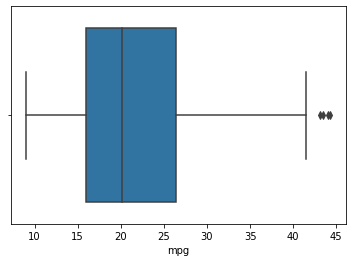

In [80]:
sns.boxplot(x=df["mpg"])

In [81]:
dfmpg = df["mpg"]
dfmpg_Q1 = dfmpg.quantile(0.25)
dfmpg_Q3 = dfmpg.quantile(0.75)
dfmpg_IQR = dfmpg_Q3 - dfmpg_Q1
dfmpg_lowerend = dfmpg_Q1 - (1.5 * dfmpg_IQR)
dfmpg_upperend = dfmpg_Q3 + (1.5 * dfmpg_IQR)

In [82]:
dfmpg_outliers = dfmpg[(dfmpg < dfmpg_lowerend) | (dfmpg > dfmpg_upperend)]
dfmpg_outliers

244    43.1
325    44.3
326    43.4
394    44.0
Name: mpg, dtype: float64

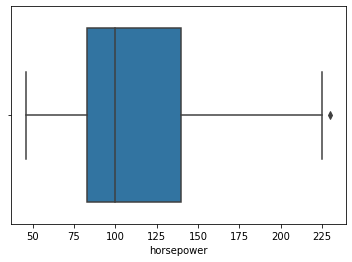

In [83]:
sns.boxplot(x=df["horsepower"])

In [84]:
dfh = df["horsepower"]
dfh_Q1 = dfh.quantile(0.25)
dfh_Q3 = dfh.quantile(0.75)
dfh_IQR = dfh_Q3 - dfh_Q1
dfh_lowerend = dfh_Q1 - (1.5 * dfh_IQR)
dfh_upperend = dfh_Q3 + (1.5 * dfh_IQR)

In [85]:
dfh_outliers = dfh[(dfh < dfh_lowerend) | (dfh > dfh_upperend)]
dfh_outliers

116    230
Name: horsepower, dtype: int64

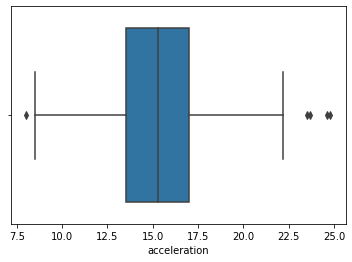

In [86]:
sns.boxplot(x=df["acceleration"])

In [87]:
dfa = df["acceleration"]
dfa_Q1 = dfa.quantile(0.25)
dfa_Q3 = dfa.quantile(0.75)
dfa_IQR = dfa_Q3 - dfa_Q1
dfa_lowerend = dfa_Q1 - (1.5 * dfa_IQR)
dfa_upperend = dfa_Q3 + (1.5 * dfa_IQR)

In [88]:
dfa_outliers = dfa[(dfa < dfa_lowerend) | (dfa > dfa_upperend)]
dfa_outliers

11      8.0
59     23.5
299    24.8
326    23.7
394    24.6
Name: acceleration, dtype: float64

In [89]:
df = df.drop([11,59,116,244,299,325,326,394])

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           305 non-null    float64
 1   cylinders     305 non-null    int64  
 2   displacement  305 non-null    float64
 3   horsepower    305 non-null    int64  
 4   weight        305 non-null    int64  
 5   acceleration  305 non-null    float64
 6   model year    305 non-null    int64  
 7   origin        305 non-null    int64  
 8   car name      305 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 23.8+ KB


In [91]:
df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


### DATA UNDERSTANDING

In [92]:
matrix = df.corr()
matrix

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.807018,-0.821378,-0.772920,-0.841150,0.351568,0.549734,0.390475
cylinders,-0.807018,1.000000,0.945774,0.837443,0.888685,-0.508708,-0.329192,-0.490017
displacement,-0.821378,0.945774,1.000000,0.896076,0.920374,-0.550429,-0.354251,-0.528237
horsepower,-0.772920,0.837443,0.896076,1.000000,0.850979,-0.679428,-0.397929,-0.366163
weight,-0.841150,0.888685,0.920374,0.850979,1.000000,-0.383841,-0.278600,-0.447386
acceleration,0.351568,-0.508708,-0.550429,-0.679428,-0.383841,1.000000,0.297697,0.169837
model year,0.549734,-0.329192,-0.354251,-0.397929,-0.278600,0.297697,1.000000,-0.024997
origin,0.390475,-0.490017,-0.528237,-0.366163,-0.447386,0.169837,-0.024997,1.000000


In [93]:
colors = {1: "blue", 2: "orange"}

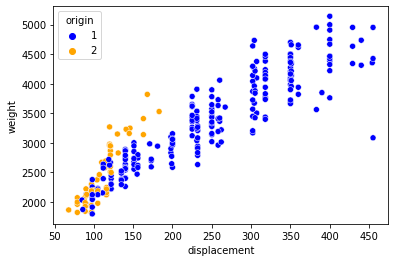

In [94]:
sns.scatterplot(data=df, x="displacement", y="weight", hue="origin", palette=colors)

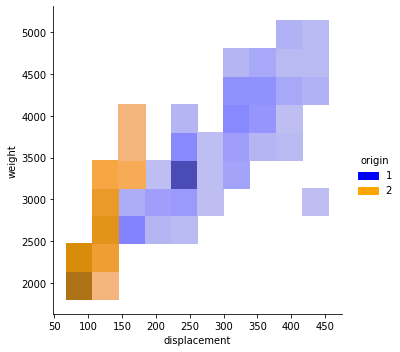

In [95]:
sns.displot(data=df, x="displacement", y="weight", hue="origin", palette=colors)

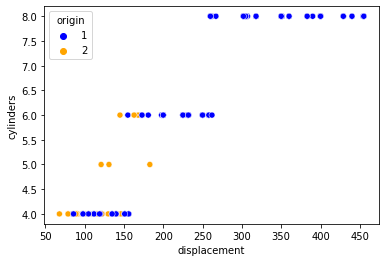

In [96]:
sns.scatterplot(data=df, x="displacement", y="cylinders", hue="origin", palette=colors)

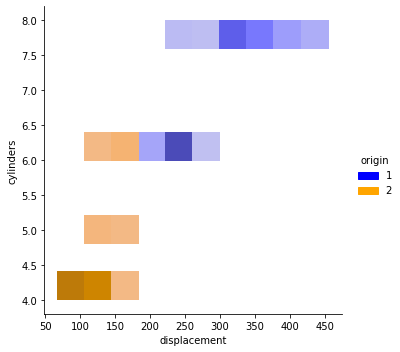

In [97]:
sns.displot(data=df, x="displacement", y="cylinders", hue="origin", palette=colors)

In [98]:
X = df.loc[:, ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration"]]
X.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration
0,18.0,8,307.0,130,3504,12.0
1,15.0,8,350.0,165,3693,11.5
2,18.0,8,318.0,150,3436,11.0
3,16.0,8,304.0,150,3433,12.0
4,17.0,8,302.0,140,3449,10.5


### DATA SCALING

In [99]:
std_scaler = StandardScaler()
X = std_scaler.fit_transform(X)

In [100]:
y = df["origin"]
y = y.to_numpy()

In [101]:
for i in range(len(y)):
  if y[i] == 1: y[i] = 0
  else: y[i] = 1 

### TRAINING & EVALUATION

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [103]:
model = KNNClassifier(k_neighbors=5)
model.fit(X_train, y_train)

**CALCULATING TRAINING ERROR**

In [104]:
y_train_pred = model.predict(X_train)

In [105]:
error_rate(y_train_pred, y_train)

0.0892018779342723

**CALCULATING TESTING ERROR**

In [106]:
y_test_pred = model.predict(X_test)

In [107]:
error_rate(y_test_pred, y_test)

0.18478260869565216

**PLOTTING CLASSIFICATION ERROR ON TRAINING AND TESTING DATASET WITH K RUNS FROM 100 DOWNTO 1**

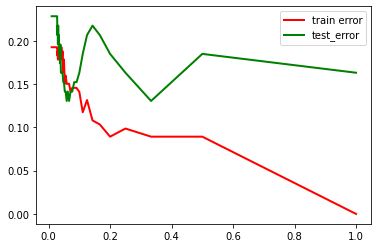

In [108]:
k_inverse = [1/i for i in range(100, 0, -1)]
train_errors = []
test_errors = []
for k in range(100, 0, -1):
  model = KNNClassifier(k_neighbors=k)
  model.fit(X_train, y_train)
  y_train_pred = model.predict(X_train)
  train_errors.append(error_rate(y_train_pred, y_train))
  y_test_pred = model.predict(X_test)
  test_errors.append(error_rate(y_test_pred, y_test))

plt.plot(k_inverse, train_errors, label="train error", color="red", linewidth=2)
plt.plot(k_inverse, test_errors, label="test_error", color="green", linewidth=2)
plt.legend()
plt.show()

## **ACOUSTIC FIRE EXTINGUISHER DATASET**

---



### DATA PREPROCESSING

In [109]:
# read data
df = pd.read_excel("gdrive/My Drive/fire.xlsx")

In [110]:
# first 5 rows
df.head(5)

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,gasoline,10,96,0.0,75,0
1,1,gasoline,10,96,0.0,72,1
2,1,gasoline,10,96,2.6,70,1
3,1,gasoline,10,96,3.2,68,1
4,1,gasoline,10,109,4.5,67,1


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17442 entries, 0 to 17441
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SIZE       17442 non-null  int64  
 1   FUEL       17442 non-null  object 
 2   DISTANCE   17442 non-null  int64  
 3   DESIBEL    17442 non-null  int64  
 4   AIRFLOW    17442 non-null  float64
 5   FREQUENCY  17442 non-null  int64  
 6   STATUS     17442 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 954.0+ KB


In [112]:
df.describe()

,SIZE,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
count,17442.000000,17442.000000,17442.000000,17442.000000,17442.000000,17442.000000
mean,3.411765,100.000000,96.379142,6.975634,31.611111,0.497821
std,1.750977,54.773826,8.164096,4.736169,20.939149,0.500010
min,1.000000,10.000000,72.000000,0.000000,1.000000,0.000000
25%,2.000000,50.000000,90.000000,3.200000,14.000000,0.000000
50%,3.000000,100.000000,95.000000,5.800000,27.500000,0.000000
75%,5.000000,150.000000,104.000000,11.200000,47.000000,1.000000
max,7.000000,190.000000,113.000000,17.000000,75.000000,1.000000


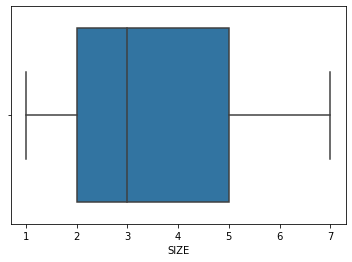

In [113]:
sns.boxplot(x=df["SIZE"])

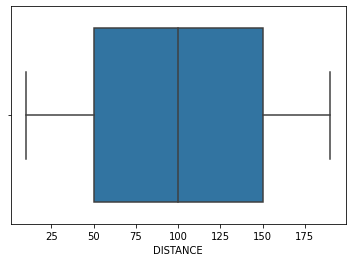

In [114]:
sns.boxplot(x=df["DISTANCE"])

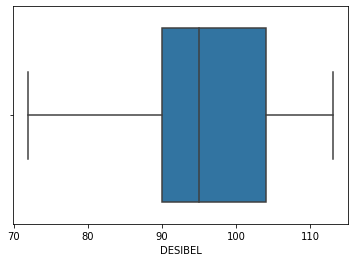

In [115]:
sns.boxplot(x=df["DESIBEL"])

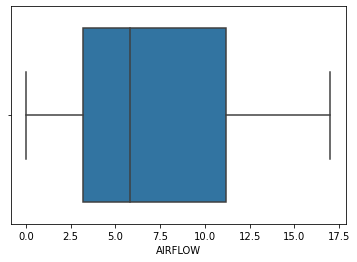

In [116]:
sns.boxplot(x=df["AIRFLOW"])

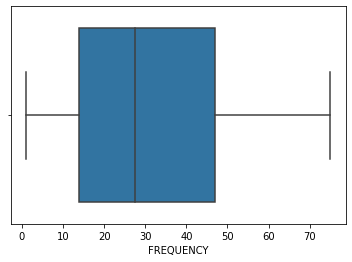

In [117]:
sns.boxplot(x=df["FREQUENCY"])

**Ideally, there is no outlier in all features**

### DATA UNDERSTANDING

In [ ]:
fire_matrix = df.corr()
fire_matrix

,SIZE,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
SIZE,1.000000e+00,-2.437871e-15,-6.125585e-15,1.677898e-16,9.978281e-17,-0.096947
DISTANCE,-2.437871e-15,1.000000e+00,-2.385897e-01,-7.074906e-01,-2.452947e-17,-0.644051
DESIBEL,-6.125585e-15,-2.385897e-01,1.000000e+00,3.769153e-01,5.617409e-01,0.203970
AIRFLOW,1.677898e-16,-7.074906e-01,3.769153e-01,1.000000e+00,-2.120462e-01,0.760628
FREQUENCY,9.978281e-17,-2.452947e-17,5.617409e-01,-2.120462e-01,1.000000e+00,-0.244203
STATUS,-9.694718e-02,-6.440506e-01,2.039698e-01,7.606279e-01,-2.442030e-01,1.000000


In [ ]:
colors = {0: "red", 1: "green"}

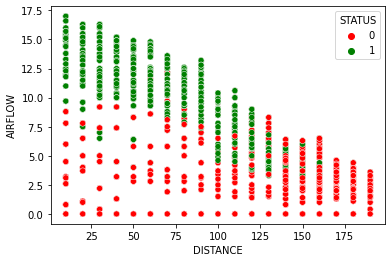

In [ ]:
sns.scatterplot(data=df, x="DISTANCE", y="AIRFLOW", hue="STATUS", palette=colors)

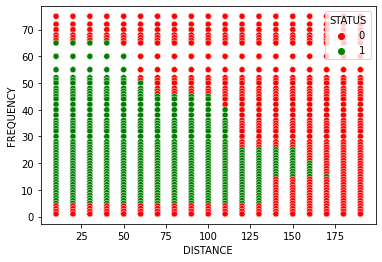

In [ ]:
sns.scatterplot(data=df, x="DISTANCE", y="FREQUENCY", hue="STATUS", palette=colors)

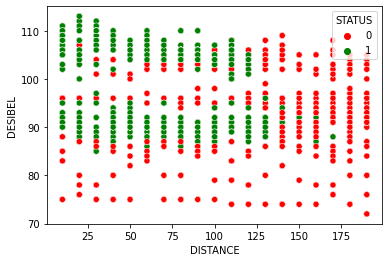

In [ ]:
sns.scatterplot(data=df, x="DISTANCE", y="DESIBEL", hue="STATUS", palette=colors)

### DATA SCALING

In [ ]:
X = df.drop(["STATUS"], axis=1)
X.head(5)

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY
0,1,gasoline,10,96,0.0,75
1,1,gasoline,10,96,0.0,72
2,1,gasoline,10,96,2.6,70
3,1,gasoline,10,96,3.2,68
4,1,gasoline,10,109,4.5,67


In [ ]:
y = df["STATUS"]
y = y.to_numpy()

In [ ]:
ord_encoder = OrdinalEncoder()
X["FUEL"] = ord_encoder.fit_transform(X[["FUEL"]])

In [ ]:
std_scaler = StandardScaler()
X = std_scaler.fit_transform(X)

### TRAINING & EVALUATION

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
model = KNNClassifier(k_neighbors = 5)
model.fit(X_train, y_train)

**CALCULATING TRAINING ERROR**

In [ ]:
y_train_pred = model.predict(X_train)

In [ ]:
error_rate(y_train_pred, y_train)

0.025063477762306496

**CALCULATING TESTING ERROR**

In [ ]:
y_test_pred = model.predict(X_test)

In [ ]:
error_rate(y_test_pred, y_test)

0.037072424995222626

**PLOTTING ERROR ON TRAINING AND TESTING DATASET WITH K RUNNING FROM 100 DOWNTO 1** (too much data for kNN so it takes extremely many hours to plot and i don't have time now)